In [90]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.formula.api as smf 
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model
from statsmodels.tsa.stattools import adfuller
from sklearn import linear_model
from statsmodels.graphics.tsaplots import plot_predict
from pandas import datetime
from matplotlib import pyplot
import math
import statsmodels.tsa.api as smt
%matplotlib inline
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

import yfinance as yf

## Question 1

In [62]:
#S&P 500 Data from Yahoo
#IN-SAMPLE
in_sample_SP500 = yf.download("^GSPC", start='2012-6-16', end='2020-2-28')
in_sample_SP500 = in_sample_SP500.drop(columns = ['Open', 'High', 'Low', 'Close', 'Volume'], axis=1)
in_sample_SP500 = in_sample_SP500.dropna()


#EVALUATION 
evaluation_SP500 = yf.download("^GSPC", start='2020-3-1', end='2022-6-18')
evaluation_SP500 = evaluation_SP500.drop(columns = ['Open', 'High', 'Low', 'Close', 'Volume'], axis=1)
evaluation_SP500 = evaluation_SP500.dropna()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [100]:
evaluation_SP500.tail()

,Adj Close,SP500_R_Close
Date,,
2022-06-13,3749.629883,-3.953993
2022-06-14,3735.479980,-0.378082
2022-06-15,3789.989990,1.448706
2022-06-16,3666.770020,-3.305221
2022-06-17,3674.840088,0.219845


In [63]:
#BAC Data from Yahoo 
#IN-SAMPLE
in_sample_BAC = yf.download("BAC", start='2012-6-16', end='2020-2-28')
in_sample_BAC = in_sample_BAC.drop(columns = ['Open', 'High', 'Low', 'Close', 'Volume'], axis=1)
in_sample_BAC = in_sample_BAC.dropna()


#EVALUATION 
evaluation_BAC = yf.download("BAC", start='2020-3-1', end='2022-6-18')
evaluation_BAC = evaluation_BAC.drop(columns = ['Open', 'High', 'Low', 'Close', 'Volume'], axis=1)
evaluation_BAC = evaluation_BAC.dropna()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [55]:
evaluation_BAC.tail()

,Adj Close
Date,
2022-06-13,32.020000
2022-06-14,31.459999
2022-06-15,32.049999
2022-06-16,31.850000
2022-06-17,31.920000


In [64]:
#Transforming the BAC data into log returns 

in_sample_BAC['BAC_R_Close'] = 100 * np.log(in_sample_BAC['Adj Close'] / in_sample_BAC['Adj Close'].shift(1))
in_sample_BAC = in_sample_BAC.dropna()

evaluation_BAC['BAC_R_Close'] = 100 * np.log(evaluation_BAC['Adj Close'] / evaluation_BAC['Adj Close'].shift(1))
evaluation_BAC = evaluation_BAC.dropna()

In [44]:
in_sample_BAC.tail()

,Adj Close
Date,
2020-02-20,32.946945
2020-02-21,32.483707
2020-02-24,30.942713
2020-02-25,29.382820
2020-02-26,28.957390


In [65]:
#Transforming the S&P500 Data 

in_sample_SP500['SP500_R_Close'] = 100 * np.log(in_sample_SP500['Adj Close'] / in_sample_SP500['Adj Close'].shift(1))
in_sample_SP500 = in_sample_SP500.dropna()

evaluation_SP500['SP500_R_Close'] = 100 * np.log(evaluation_SP500['Adj Close'] / evaluation_SP500['Adj Close'].shift(1))
evaluation_SP500 = evaluation_SP500.dropna()
in_sample_SP500

,Adj Close,SP500_R_Close
Date,,
2012-06-18,1344.780029,0.144370
2012-06-19,1357.979980,0.976783
2012-06-20,1355.689941,-0.168778
2012-06-21,1325.510010,-2.251321
2012-06-22,1335.020020,0.714899
...,...,...
2020-02-20,3373.229980,-0.382282
2020-02-21,3337.750000,-1.057381
2020-02-24,3225.889893,-3.408808


# Using BAC to build a NAIVE forecast model 

In [66]:
#building the NAIVE model for the BAC stock 
train_len = len(in_sample_BAC)

naive = evaluation_BAC.copy()
naive['Naive Forecast'] = in_sample_BAC['BAC_R_Close'][train_len - 1]

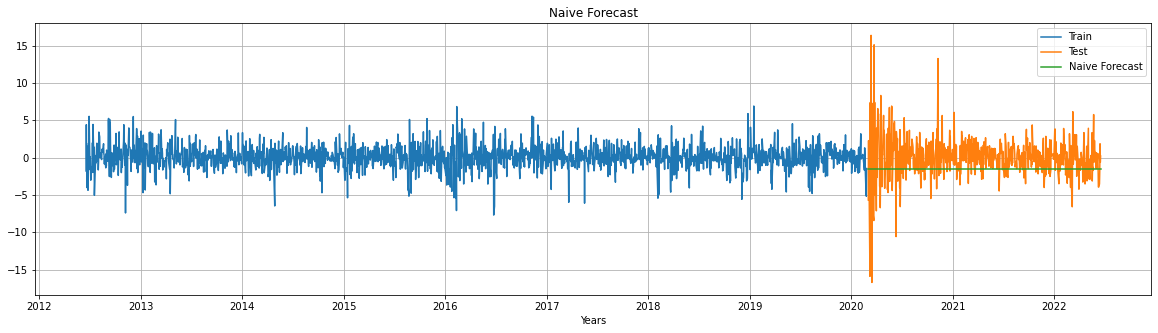

In [67]:
#plot the naive model 
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(in_sample_BAC['BAC_R_Close'], label = 'Train')
plt.plot(evaluation_BAC['BAC_R_Close'], label = 'Test')
plt.plot(naive['Naive Forecast'], label = 'Naive Forecast')
plt.xlabel("Years")
plt.legend(loc = 'best')
plt.title('Naive Forecast')
plt.show()

In [68]:
#to get the RMSE 

MSE = mean_squared_error(evaluation_BAC['BAC_R_Close'], naive['Naive Forecast'])
RMSFE = math.sqrt(MSE)
print("Root Mean Square Forecast Error: " + str(RMSFE))

Root Mean Square Forecast Error: 3.1469958022146223


In [69]:
#To get the root mean absolute error 

MAE = mean_absolute_error(evaluation_BAC['BAC_R_Close'], naive['Naive Forecast'])
RMAFE = math.sqrt(MAE)
print("Root Mean Square Forecast Error: " + str(RMAFE))

Root Mean Square Forecast Error: 1.5206205239010149


#  Using BAC to build a Reg-AR(1) Model 

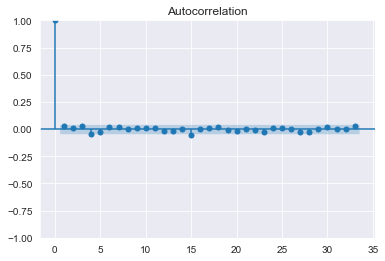

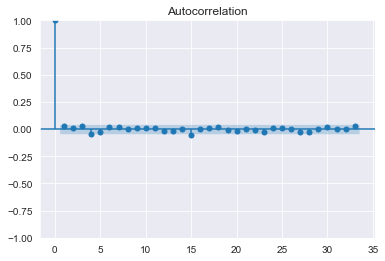

In [114]:
#plot the ACF and see why its a AR(1) model 
plot_acf(in_sample_BAC['BAC_R_Close'])

#We can clearly see that there is a spike in the ACF plot at lag 1 but no other signifcant spike anywhere else on the plot. This can indicate an AR model 
#From this we can see that since the only significant spike was at lag 1, it is a AR(1) model. So we can fit a model for the data using AR(1)

In [115]:
#Build a AR(1) model using comapny returns 
ar1 = smt.ARIMA(in_sample_BAC['BAC_R_Close'], order = (1,0,0))
res = ar1.fit()
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:            BAC_R_Close   No. Observations:                 1935
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -3673.015
Date:                Wed, 10 Aug 2022   AIC                           7352.029
Time:                        15:04:24   BIC                           7368.733
Sample:                             0   HQIC                          7358.173
                               - 1935                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0750      0.038      1.957      0.050      -0.000       0.150
ar.L1          0.0281      0.017      1.617      0.106      -0.006       0.062
sigma2         2.6078      0.057     45.397      0.0

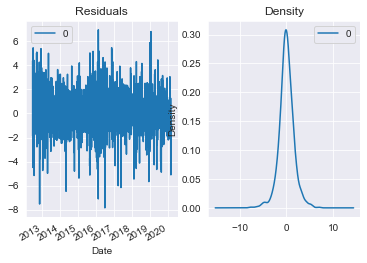

In [116]:
#plot the residual errors from the AR(1) model 
residuals = pd.DataFrame(res.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title = "Residuals", ax = ax[0])
residuals.plot(kind = 'kde', title = 'Density', ax = ax[1])
plt.show()

#We can see that the residual errors seem fine with a mean near zero and a uniform variance 

In [117]:
print(residuals.describe())

                 0
count  1935.000000
mean      0.000017
std       1.615297
min      -7.856427
25%      -0.841504
50%      -0.015368
75%       0.911536
max       6.966043


In [96]:
forecast = res.predict(start = '2020-3-1', end = '2022-6-16')

KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

In [122]:
#plot the ARIMA model 
training_data = in_sample_BAC['BAC_R_Close'].values
test_data = evaluation_BAC['BAC_R_Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)

for time_point in range(N_test_observations):
    model = ARIMA(history, order=(1,0,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)


In [123]:
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

Testing Mean Squared Error is 7.711598467038898


AttributeError: 'Series' object has no attribute 'Date'

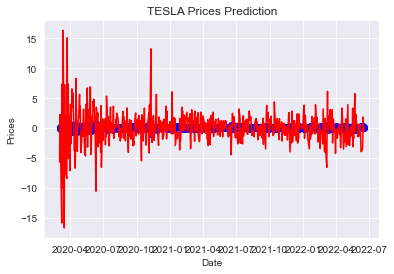

In [128]:
test_set_range = evaluation_BAC['BAC_R_Close'].index

plt.plot(test_set_range, model_predictions, color='blue', marker='o',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('TESLA Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.xticks(np.arange(881,1259,50), in_sample_BAC['BAC_R_Close'].Date[881:1259:50])
plt.legend()
plt.show()

In [25]:
#Forecast 
fc, se, conf = res.forecast(579, alpha = 0.05)  # 95% conf
# Make as pandas series
fc_series = pd.Series(fc, index = evaluation_BAC['BAC_R_Close'].index)
lower_series = pd.Series(conf[:, 0], index = evaluation_BAC['BAC_R_Close'].index)
upper_series = pd.Series(conf[:, 1], index = evaluation_BAC['BAC_R_Close'].index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(in_sample_BAC['BAC_R_Close'], label = 'training')
plt.plot(evaluation_BAC['BAC_R_Close'], label = 'actual')
plt.plot(fc_series, label = 'forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

ValueError: too many values to unpack (expected 3)

#  Using BAC to build a CAPM Model 

In [104]:
#get the risk free rate (treasury data) 
risk_free = yf.download("^IRX", start='2012-6-16', end='2020-2-28')
risk_free = risk_free.drop(columns = ['Open', 'High', 'Low', 'Close', 'Volume'], axis=1)
risk_free = risk_free.dropna()
risk_free

[*********************100%***********************]  1 of 1 completed


,Adj Close
Date,
2012-06-15,0.085
2012-06-18,0.075
2012-06-19,0.090
2012-06-20,0.080
2012-06-21,0.075
...,...
2020-02-21,1.518
2020-02-24,1.503
2020-02-25,1.490


In [105]:
#transform the data 
risk_free['Risk_Free'] = 100/360 * np.log(1 + risk_free['Adj Close'])
risk_free = risk_free.dropna()
risk_free

,Adj Close,Risk_Free
Date,,
2012-06-15,0.085,0.022661
2012-06-18,0.075,0.020089
2012-06-19,0.090,0.023938
2012-06-20,0.080,0.021378
2012-06-21,0.075,0.020089
...,...,...
2020-02-21,1.518,0.256518
2020-02-24,1.503,0.254858
2020-02-25,1.490,0.253412


In [106]:
#merge the 3 datasets into 1 
capm = pd.merge(in_sample_BAC, in_sample_SP500, on = 'Date', how = 'left')
capm = pd.merge(capm, risk_free, on = 'Date', how = 'left')
capm = capm.dropna()
capm = capm.rename(columns = {'Adj Close_x' : 'BAC Adj Close'})
capm = capm.rename(columns = {'Adj Close_y' : 'SP500 Adj Close'})
display(capm)

,BAC Adj Close,BAC_R_Close,SP500 Adj Close,SP500_R_Close,Adj Close,Risk_Free
Date,,,,,,
2012-06-18,6.661012,-1.788037,1344.780029,0.144370,0.075,0.020089
2012-06-19,6.961441,4.411505,1357.979980,0.976783,0.090,0.023938
2012-06-20,6.987195,0.369262,1355.689941,-0.168778,0.080,0.021378
2012-06-21,6.712514,-4.010559,1325.510010,-2.251321,0.075,0.020089
2012-06-22,6.815519,1.522866,1335.020020,0.714899,0.075,0.020089
...,...,...,...,...,...,...
2020-02-20,32.946953,0.373739,3373.229980,-0.382282,1.538,0.258716
2020-02-21,32.483715,-1.415989,3337.750000,-1.057381,1.518,0.256518
2020-02-24,30.942720,-4.860112,3225.889893,-3.408808,1.503,0.254858


In [107]:
#Generate market risk premium and BAC excess returns 
capm['BAC Excess Return'] = capm['BAC_R_Close'] - capm['Risk_Free']
capm['Market Risk Premium'] = capm['SP500_R_Close'] - capm['Risk_Free']
capm = capm.replace([np.inf, -np.inf], np.nan)
capm = capm.dropna()
display(capm)



,BAC Adj Close,BAC_R_Close,SP500 Adj Close,SP500_R_Close,Adj Close,Risk_Free,BAC Excess Return,Market Risk Premium
Date,,,,,,,,
2012-06-18,6.661012,-1.788037,1344.780029,0.144370,0.075,0.020089,-1.808126,0.124281
2012-06-19,6.961441,4.411505,1357.979980,0.976783,0.090,0.023938,4.387567,0.952845
2012-06-20,6.987195,0.369262,1355.689941,-0.168778,0.080,0.021378,0.347884,-0.190156
2012-06-21,6.712514,-4.010559,1325.510010,-2.251321,0.075,0.020089,-4.030648,-2.271410
2012-06-22,6.815519,1.522866,1335.020020,0.714899,0.075,0.020089,1.502777,0.694810
...,...,...,...,...,...,...,...,...
2020-02-20,32.946953,0.373739,3373.229980,-0.382282,1.538,0.258716,0.115023,-0.640997
2020-02-21,32.483715,-1.415989,3337.750000,-1.057381,1.518,0.256518,-1.672507,-1.313899
2020-02-24,30.942720,-4.860112,3225.889893,-3.408808,1.503,0.254858,-5.114971,-3.663666


In [108]:
#Creating the CAPM model for BAC 
X = capm['Market Risk Premium']
Y = capm['BAC Excess Return']


X = sm.add_constant(X)
CAPM_BAC = sm.OLS(Y,X).fit()
predictions = CAPM_BAC.predict()
CAPM_BAC_Summary = (CAPM_BAC.summary())
print(CAPM_BAC_Summary)

                            OLS Regression Results                            
Dep. Variable:      BAC Excess Return   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     1730.
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          1.62e-270
Time:                        14:32:40   Log-Likelihood:                -3059.9
No. Observations:                1933   AIC:                             6124.
Df Residuals:                    1931   BIC:                             6135.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0581    

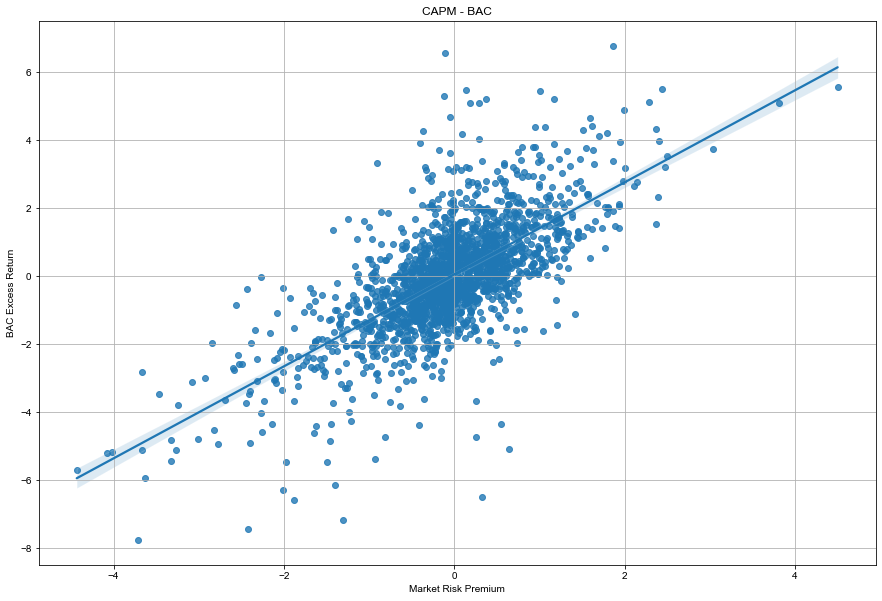

In [109]:
#plot the BAC returns with the market premium return 
fig, CAPM_plot = plt.subplots()
fig.set_size_inches(15, 10)
sns.set_style('darkgrid')
plt.title("CAPM - BAC")
plt.grid()
CAPM_plot = sns.regplot(x = 'Market Risk Premium', y = 'BAC Excess Return', data = capm)

In [113]:
#Calculate the RMSFE and RMAFE values for Naive Model 

#RMSE
MSE = mean_squared_error(capm['BAC Excess Return'], predictions)
RMSFE = math.sqrt(MSE)

#RMAE
MAE = mean_absolute_error(capm['BAC Excess Return'], predictions)
RMAFE = math.sqrt(MAE)

print("Root Mean Square Forecast Error: " + str(RMSFE))
print("Root Mean Absolute Forecast Error: " + str(RMAFE))


Root Mean Square Forecast Error: 1.1782892770363367
Root Mean Absolute Forecast Error: 0.922373056504062


# Question B 

In [32]:
#GARCH(1,1)

# This is the code for the GARCH(1,1) model 
model = arch_model(in_sample_BAC['BAC_R_Close'], mean = 'Zero', vol = 'GARCH', p = 1, q = 1)
model.fit()


Iteration:      1,   Func. Count:      5,   Neg. LLF: 11142.71643926453
Iteration:      2,   Func. Count:     13,   Neg. LLF: 3689.8289893016804
Iteration:      3,   Func. Count:     19,   Neg. LLF: 221176505.80622485
Iteration:      4,   Func. Count:     24,   Neg. LLF: 3613.1468862272454
Iteration:      5,   Func. Count:     29,   Neg. LLF: 3610.771218271362
Iteration:      6,   Func. Count:     33,   Neg. LLF: 3610.766318492431
Iteration:      7,   Func. Count:     37,   Neg. LLF: 3610.7662955861683
Iteration:      8,   Func. Count:     40,   Neg. LLF: 3610.766295584325
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3610.7662955861683
            Iterations: 8
            Function evaluations: 40
            Gradient evaluations: 8


                       Zero Mean - GARCH Model Results                        
Dep. Variable:            BAC_R_Close   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                      GARCH   Log-Likelihood:               -3610.77
Distribution:                  Normal   AIC:                           7227.53
Method:            Maximum Likelihood   BIC:                           7244.24
                                        No. Observations:                 1935
Date:                Thu, Aug 04 2022   Df Residuals:                     1935
Time:                        15:01:56   Df Model:                            0
                              Volatility Model                             
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.2356      0.132      1.789  7.355e-02 [-2.24

In [33]:
#GJR-GARCH(1,1)

#am = arch_model(in_sample_BAC['BAC_R_Close'], p = 1, o = 0, q = 1, vol = 'GARCH')
#res = am.fit()
#print(res.summary())
am = arch_model(in_sample_BAC['BAC_R_Close'], p = 1, o = 1, q = 1)
res = am.fit(update_freq = 5, disp = "off")
print(res.summary())



                   Constant Mean - GJR-GARCH Model Results                    
Dep. Variable:            BAC_R_Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:               -3594.05
Distribution:                  Normal   AIC:                           7198.10
Method:            Maximum Likelihood   BIC:                           7225.94
                                        No. Observations:                 1935
Date:                Thu, Aug 04 2022   Df Residuals:                     1934
Time:                        15:01:59   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0762  3.332e-02      2.287  2.220e-02 [1.090e-0

In [34]:
#EGARCH(1,0) 

# am = arch_model(data['rjpy'], vol='EGARCH', p=1, o=1, q=1)
# res = am.fit()
# print(res.summary())
model = arch_model(in_sample_BAC['BAC_R_Close'], mean ='constant', vol = 'EGARCH', p = 1,o = 1, q = 1)
res = model.fit(update_freq = 5)
res


#model = arch_model(dta, mean = 'constant', vol = 'EGARCH', p = 1,o = 1, q = 1)
#res = model.fit(update_freq = 5)
#res


Iteration:      5,   Func. Count:     46,   Neg. LLF: 3641.17837505055
Iteration:     10,   Func. Count:     77,   Neg. LLF: 3591.965916404839
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3591.9658160271765
            Iterations: 13
            Function evaluations: 98
            Gradient evaluations: 13


                     Constant Mean - EGARCH Model Results                     
Dep. Variable:            BAC_R_Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     EGARCH   Log-Likelihood:               -3591.97
Distribution:                  Normal   AIC:                           7193.93
Method:            Maximum Likelihood   BIC:                           7221.77
                                        No. Observations:                 1935
Date:                Thu, Aug 04 2022   Df Residuals:                     1934
Time:                        15:02:01   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0690  1.908e-03     36.186 1.014e-286 [6.

In [ ]:
#News Impact Curve 

